In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("popdat.csv")

In [3]:
df.columns

Index(['Index', 'Variant', 'Region', 'Notes', 'Country code', 'Type',
       'Parent code', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [4]:
#Attribute Selection:
df1=df[['Index', 'Region','1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020']]

In [5]:
df2=df[['Index','1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020']]

In [6]:
#one hot encoding
y = LabelBinarizer().fit_transform(df.Region)


In [7]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [1]:
df4 = pd.concat([df,pd.get_dummies(df['Region'], prefix='country')],axis=1)


NameError: name 'pd' is not defined

In [9]:
df4.head(-5)

,Index,Variant,Region,Notes,Country code,Type,Parent code,1950,1951,1952,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Wallis and Futuna Islands,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,1,Estimates,Afghanistan,NaN,4,Country/Area,5501,7752.117,7840.151,7935.996,...,0,0,0,0,0,0,0,0,0,0
1,2,Estimates,Albania,NaN,8,Country/Area,925,1263.164,1287.499,1316.090,...,0,0,0,0,0,0,0,0,0,0
2,3,Estimates,Algeria,NaN,12,Country/Area,912,8872.250,9023.263,9186.150,...,0,0,0,0,0,0,0,0,0,0
3,4,Estimates,American Samoa,16.0,16,Country/Area,957,18.941,19.287,19.546,...,0,0,0,0,0,0,0,0,0,0
4,5,Estimates,Andorra,NaN,20,Country/Area,925,6.198,6.693,7.251,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Estimates,Uruguay,NaN,858,Country/Area,931,2238.501,2261.340,2286.261,...,1,0,0,0,0,0,0,0,0,0
226,227,Estimates,Uzbekistan,NaN,860,Country/Area,5500,6264.058,6470.057,6667.892,...,0,1,0,0,0,0,0,0,0,0
227,228,Estimates,Vanuatu,NaN,548,Country/Area,928,47.696,48.919,50.291,...,0,0,1,0,0,0,0,0,0,0
228,229,Estimates,Venezuela (Bolivarian Republic of),NaN,862,Country/Area,931,5481.976,5726.610,5974.437,...,0,0,0,1,0,0,0,0,0,0


In [10]:
a=df1
print(a)

     Index                     Region      1950      1951      1952      1953  \
0        1                Afghanistan  7752.117  7840.151  7935.996  8039.684   
1        2                    Albania  1263.164  1287.499  1316.090  1348.113   
2        3                    Algeria  8872.250  9023.263  9186.150  9364.381   
3        4             American Samoa    18.941    19.287    19.546    19.699   
4        5                    Andorra     6.198     6.693     7.251     7.859   
..     ...                        ...       ...       ...       ...       ...   
230    231  Wallis and Futuna Islands     6.994     7.132     7.274     7.417   
231    232             Western Sahara    13.763    16.054    17.575    18.727   
232    233                      Yemen  4661.279  4717.141  4776.184  4837.606   
233    234                     Zambia  2310.436  2368.607  2431.341  2498.457   
234    235                   Zimbabwe  2746.852  2832.248  2922.040  3015.662   

         1954      1955    

In [11]:
b=df1.dropna(how='any')# any if 1 val is na ,all if all vals are na
print(b)

     Index                     Region      1950      1951      1952      1953  \
0        1                Afghanistan  7752.117  7840.151  7935.996  8039.684   
1        2                    Albania  1263.164  1287.499  1316.090  1348.113   
2        3                    Algeria  8872.250  9023.263  9186.150  9364.381   
3        4             American Samoa    18.941    19.287    19.546    19.699   
4        5                    Andorra     6.198     6.693     7.251     7.859   
..     ...                        ...       ...       ...       ...       ...   
230    231  Wallis and Futuna Islands     6.994     7.132     7.274     7.417   
231    232             Western Sahara    13.763    16.054    17.575    18.727   
232    233                      Yemen  4661.279  4717.141  4776.184  4837.606   
233    234                     Zambia  2310.436  2368.607  2431.341  2498.457   
234    235                   Zimbabwe  2746.852  2832.248  2922.040  3015.662   

         1954      1955    

In [12]:
#number of droped rows is 
a['Index'].count()-b['Index'].count()

6

In [13]:
c=df1.fillna(0)

In [14]:
print (c)

     Index                     Region      1950      1951      1952      1953  \
0        1                Afghanistan  7752.117  7840.151  7935.996  8039.684   
1        2                    Albania  1263.164  1287.499  1316.090  1348.113   
2        3                    Algeria  8872.250  9023.263  9186.150  9364.381   
3        4             American Samoa    18.941    19.287    19.546    19.699   
4        5                    Andorra     6.198     6.693     7.251     7.859   
..     ...                        ...       ...       ...       ...       ...   
230    231  Wallis and Futuna Islands     6.994     7.132     7.274     7.417   
231    232             Western Sahara    13.763    16.054    17.575    18.727   
232    233                      Yemen  4661.279  4717.141  4776.184  4837.606   
233    234                     Zambia  2310.436  2368.607  2431.341  2498.457   
234    235                   Zimbabwe  2746.852  2832.248  2922.040  3015.662   

         1954      1955    

In [15]:
d=df1.fillna(df1.mean())

In [16]:
print(d)

     Index                     Region      1950      1951      1952      1953  \
0        1                Afghanistan  7752.117  7840.151  7935.996  8039.684   
1        2                    Albania  1263.164  1287.499  1316.090  1348.113   
2        3                    Algeria  8872.250  9023.263  9186.150  9364.381   
3        4             American Samoa    18.941    19.287    19.546    19.699   
4        5                    Andorra     6.198     6.693     7.251     7.859   
..     ...                        ...       ...       ...       ...       ...   
230    231  Wallis and Futuna Islands     6.994     7.132     7.274     7.417   
231    232             Western Sahara    13.763    16.054    17.575    18.727   
232    233                      Yemen  4661.279  4717.141  4776.184  4837.606   
233    234                     Zambia  2310.436  2368.607  2431.341  2498.457   
234    235                   Zimbabwe  2746.852  2832.248  2922.040  3015.662   

         1954      1955    

In [17]:
e=df1.fillna(method='ffill').fillna(method='bfill')

In [18]:
print(e)

     Index                     Region      1950      1951      1952      1953  \
0        1                Afghanistan  7752.117  7840.151  7935.996  8039.684   
1        2                    Albania  1263.164  1287.499  1316.090  1348.113   
2        3                    Algeria  8872.250  9023.263  9186.150  9364.381   
3        4             American Samoa    18.941    19.287    19.546    19.699   
4        5                    Andorra     6.198     6.693     7.251     7.859   
..     ...                        ...       ...       ...       ...       ...   
230    231  Wallis and Futuna Islands     6.994     7.132     7.274     7.417   
231    232             Western Sahara    13.763    16.054    17.575    18.727   
232    233                      Yemen  4661.279  4717.141  4776.184  4837.606   
233    234                     Zambia  2310.436  2368.607  2431.341  2498.457   
234    235                   Zimbabwe  2746.852  2832.248  2922.040  3015.662   

         1954      1955    

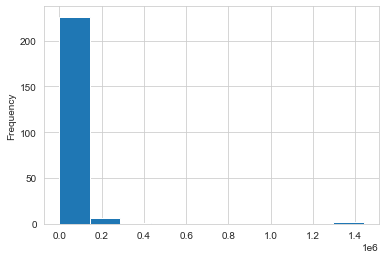

In [19]:
#binning 
sns.set_style('whitegrid')

df3 = df.groupby(['Index', 'Region'])['2020'].sum().reset_index()

df['2020'].plot(kind='hist')

In [20]:
pd.qcut(df['2020'], q=4).value_counts()

(20577.056, 1439323.774]    59
(398.874, 5459.643]         59
(0.808, 398.874]            59
(5459.643, 20577.056]       58
Name: 2020, dtype: int64

In [21]:
df3['bin'] = pd.qcut(df3['2020'], q=4)

In [22]:
df3

,Index,Region,2020,bin
0,1,Afghanistan,38928.341,"(20577.056, 1439323.774]"
1,2,Albania,2877.800,"(398.874, 5459.643]"
2,3,Algeria,43851.043,"(20577.056, 1439323.774]"
3,4,American Samoa,55.197,"(0.808, 398.874]"
4,5,Andorra,77.265,"(0.808, 398.874]"
...,...,...,...,...
230,231,Wallis and Futuna Islands,11.246,"(0.808, 398.874]"
231,232,Western Sahara,597.330,"(398.874, 5459.643]"
232,233,Yemen,29825.968,"(20577.056, 1439323.774]"
233,234,Zambia,18383.956,"(5459.643, 20577.056]"


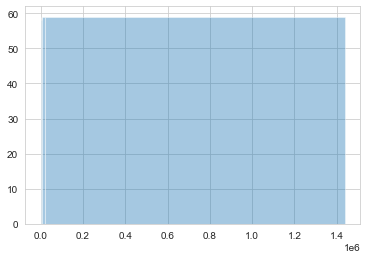

In [23]:
list=[0.808, 398.874,5459.643, 20577.056,1439323.774]
sns.distplot(df['2020'].values,
             bins=list,kde=False)

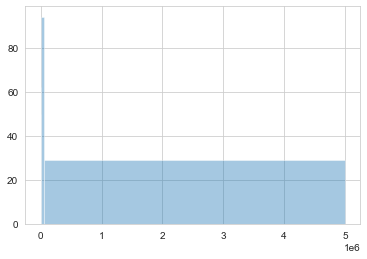

In [24]:
list=[0, 500,5000, 50000,5000000]
sns.distplot(df['2020'].values,
             bins=list,kde=False)

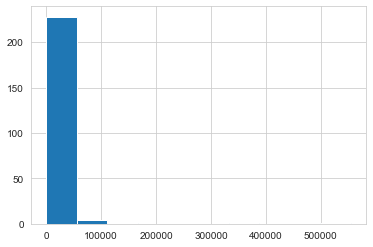

In [25]:
#regression
df['1950'].hist()
#not normally distributed

In [26]:
df4 = pd.read_csv("Height_Weight.csv")
df4=df4[['Height','Weight']]

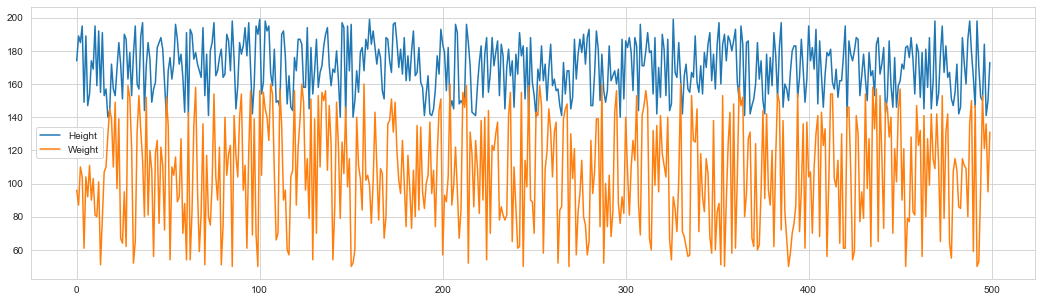

In [27]:
df4.plot(figsize=(18,5))

In [28]:
df4.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8742BB9A0>,
      dtype=object)

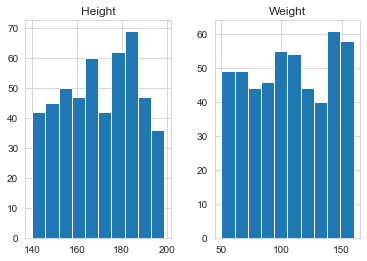

In [29]:
df4.hist()

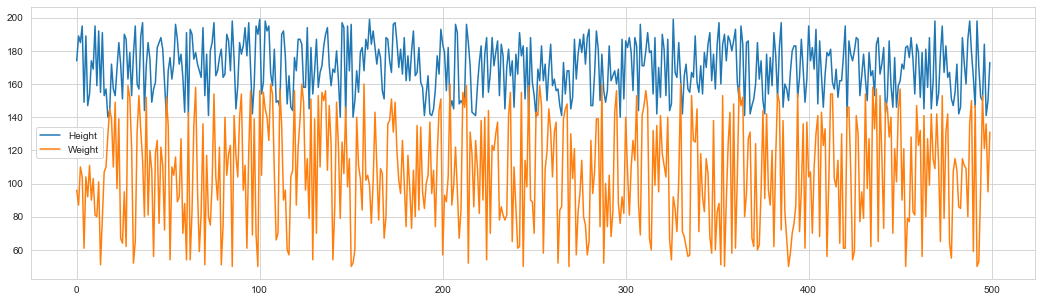

In [30]:
std_dev = 3
df4 = df4[(np.abs(stats.zscore(df4)) < float(std_dev)).all(axis=1)]
df4.plot(figsize=(18,5))

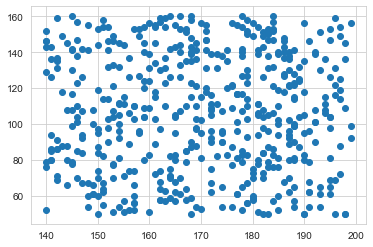

In [31]:
plt.scatter(df4['Height'], df4['Weight'])

In [32]:
scores = []
X = pd.DataFrame(df4['Height'])
y = pd.DataFrame(df4['Weight'])
model = LinearRegression()
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)



[-0.005982325478128381, -0.008351624270051206, -0.0035992635225690073]


In [33]:
#clustering
df3=df[['Index','2020']]

[[1.15655000e+02 7.68750940e+03]
 [7.20000000e+01 1.40966408e+06]
 [1.39703704e+02 7.51541374e+04]
 [1.13833333e+02 2.34801163e+05]]


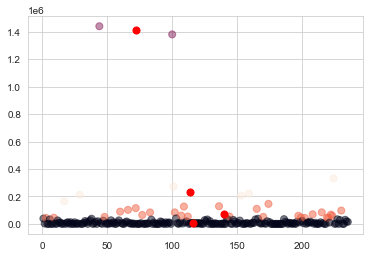

In [34]:
kmeans = KMeans(n_clusters=4).fit(df3)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df3['Index'],df3['2020'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [35]:
#2. Data Transformation:
#standardisation:(mean)
standardised_df2=(df2-df2.mean())/df2.std()

In [36]:
standardised_df2

,Index,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-1.721023,-0.065895,-0.067631,-0.068114,-0.068437,-0.068376,-0.069693,-0.070195,-0.071229,-0.071786,...,0.001233,0.006616,0.012404,0.018043,0.023146,0.027619,0.031610,0.035284,0.038892,0.042616
1,-1.706313,-0.206494,-0.206133,-0.205299,-0.204960,-0.203915,-0.204989,-0.205078,-0.205506,-0.205809,...,-0.215162,-0.216208,-0.217234,-0.218245,-0.219244,-0.220231,-0.221204,-0.222175,-0.223155,-0.224154
2,-1.691603,-0.041625,-0.042624,-0.042207,-0.041410,-0.040164,-0.040006,-0.038955,-0.038426,-0.037345,...,0.053316,0.055701,0.058312,0.061098,0.064011,0.067038,0.070147,0.073250,0.076241,0.079043
3,-1.676894,-0.233453,-0.232939,-0.232168,-0.232062,-0.231212,-0.232641,-0.233055,-0.233764,-0.234421,...,-0.238026,-0.238756,-0.239506,-0.240269,-0.241042,-0.241820,-0.242607,-0.243403,-0.244213,-0.245041
4,-1.662184,-0.233730,-0.233205,-0.232423,-0.232304,-0.231436,-0.232849,-0.233244,-0.233934,-0.234572,...,-0.237804,-0.238545,-0.239310,-0.240088,-0.240871,-0.241656,-0.242445,-0.243241,-0.244051,-0.244877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1.662184,-0.233712,-0.233196,-0.232422,-0.232313,-0.231456,-0.232880,-0.233287,-0.233989,-0.234641,...,-0.238371,-0.239097,-0.239845,-0.240606,-0.241376,-0.242153,-0.242938,-0.243732,-0.244540,-0.245366
231,1.676894,-0.233566,-0.233007,-0.232209,-0.232082,-0.231210,-0.232613,-0.232995,-0.233665,-0.234279,...,-0.234589,-0.235284,-0.235993,-0.236709,-0.237424,-0.238137,-0.238846,-0.239559,-0.240285,-0.241029
232,1.691603,-0.132866,-0.133641,-0.133595,-0.133767,-0.133467,-0.134970,-0.135640,-0.136808,-0.137723,...,-0.048987,-0.046143,-0.043293,-0.040476,-0.037720,-0.035035,-0.032413,-0.029839,-0.027287,-0.024741
233,1.706313,-0.183803,-0.183282,-0.182188,-0.181490,-0.180148,-0.180797,-0.180496,-0.180578,-0.180489,...,-0.126860,-0.125089,-0.123217,-0.121298,-0.119369,-0.117442,-0.115503,-0.113535,-0.111511,-0.109410


In [37]:
#Normalization:(min max)
normalized_df2=(df2-df2.min())/(df2.max()-df2.min())

In [38]:
normalized_df2

,Index,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.000000,0.013981,0.013755,0.013621,0.013548,0.013515,0.013508,0.013515,0.013532,0.013555,...,0.021879,0.022512,0.023184,0.023845,0.024461,0.025022,0.025542,0.026037,0.026532,0.027046
1,0.004274,0.002277,0.002258,0.002258,0.002270,0.002292,0.002318,0.002347,0.002377,0.002409,...,0.002127,0.002105,0.002086,0.002069,0.002054,0.002041,0.002029,0.002019,0.002009,0.001999
2,0.008547,0.016001,0.015831,0.015767,0.015780,0.015851,0.015963,0.016102,0.016257,0.016419,...,0.026633,0.027007,0.027401,0.027813,0.028238,0.028677,0.029126,0.029578,0.030027,0.030466
3,0.012821,0.000033,0.000032,0.000032,0.000032,0.000031,0.000031,0.000030,0.000030,0.000029,...,0.000040,0.000040,0.000039,0.000039,0.000039,0.000039,0.000039,0.000038,0.000038,0.000038
4,0.017094,0.000010,0.000010,0.000011,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,...,0.000060,0.000059,0.000057,0.000056,0.000055,0.000054,0.000054,0.000053,0.000053,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.982906,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000007,0.000007
231,0.987179,0.000023,0.000027,0.000029,0.000030,0.000031,0.000033,0.000035,0.000038,0.000041,...,0.000354,0.000358,0.000362,0.000367,0.000373,0.000380,0.000388,0.000397,0.000406,0.000414
232,0.991453,0.008406,0.008275,0.008197,0.008151,0.008125,0.008109,0.008096,0.008084,0.008071,...,0.017295,0.017680,0.018066,0.018452,0.018834,0.019213,0.019587,0.019961,0.020339,0.020722
233,0.995726,0.004166,0.004155,0.004172,0.004209,0.004260,0.004319,0.004382,0.004448,0.004515,...,0.010187,0.010450,0.010723,0.011004,0.011287,0.011571,0.011860,0.012153,0.012457,0.012772


In [39]:
#Concept Hierarchy Generation:
round(df2['2020'], -2)

0      38900.0
1       2900.0
2      43900.0
3        100.0
4        100.0
        ...   
230        0.0
231      600.0
232    29800.0
233    18400.0
234    14900.0
Name: 2020, Length: 235, dtype: float64

In [40]:
a=int(len(df));
b=int(a/1.25)
print(a)
print(b)

235
188


In [41]:
test_data=df[b+1:a]
train_data=df[:b]

In [42]:
test_data

,Index,Variant,Region,Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
189,190,Estimates,Sierra Leone,NaN,694,Country/Area,914,2041.201,2064.466,2088.480,...,6563.238,6712.586,6863.975,7017.153,7171.909,7328.846,7488.427,7650.149,7813.207,7976.985
190,191,Estimates,Singapore,NaN,702,Country/Area,920,1022.095,1067.797,1119.932,...,5263.640,5369.469,5453.732,5525.628,5592.143,5653.625,5708.042,5757.503,5804.343,5850.343
191,192,Estimates,Sint Maarten (Dutch part),15.0,534,Country/Area,915,1.490,1.662,1.797,...,35.050,36.238,37.580,38.872,39.967,40.812,41.444,41.936,42.389,42.882
192,193,Estimates,Slovakia,NaN,703,Country/Area,923,3436.576,3510.922,3587.655,...,5408.932,5414.894,5421.721,5428.798,5435.614,5442.001,5447.903,5453.017,5457.012,5459.643
193,194,Estimates,Slovenia,NaN,705,Country/Area,925,1473.093,1481.629,1491.677,...,2051.278,2057.826,2063.120,2067.488,2071.199,2074.205,2076.395,2077.836,2078.654,2078.932
194,195,Estimates,Solomon Islands,NaN,90,Country/Area,928,89.793,91.790,94.059,...,541.522,556.066,571.329,587.079,603.133,619.438,636.030,652.856,669.821,686.878
195,196,Estimates,Somalia,NaN,706,Country/Area,910,2264.076,2307.679,2351.943,...,12376.305,12715.487,13063.711,13423.571,13797.204,14185.635,14589.165,15008.225,15442.906,15893.219
196,197,Estimates,South Africa,NaN,710,Country/Area,913,13628.434,13921.934,14226.257,...,52003.759,52832.659,53687.125,54544.184,55386.369,56207.649,57009.751,57792.520,58558.267,59308.690
197,198,Estimates,South Sudan,NaN,728,Country/Area,910,2482.306,2501.570,2525.204,...,9830.695,10113.648,10355.030,10554.882,10715.657,10832.520,10910.774,10975.924,11062.114,11193.729
198,199,Estimates,Spain,32.0,724,Country/Area,925,28069.734,28219.620,28399.033,...,47084.242,47063.059,46930.554,46777.927,46671.919,46634.131,46647.425,46692.863,46736.782,46754.783


In [43]:
train_data

,Index,Variant,Region,Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,Afghanistan,NaN,4,Country/Area,5501,7752.117,7840.151,7935.996,...,30117.411,31161.378,32269.592,33370.804,34413.603,35383.028,36296.111,37171.922,38041.757,38928.341
1,2,Estimates,Albania,NaN,8,Country/Area,925,1263.164,1287.499,1316.090,...,2928.601,2914.091,2903.788,2896.307,2890.524,2886.427,2884.169,2882.735,2880.913,2877.800
2,3,Estimates,Algeria,NaN,12,Country/Area,912,8872.250,9023.263,9186.150,...,36661.438,37383.899,38140.135,38923.688,39728.020,40551.398,41389.174,42228.415,43053.054,43851.043
3,4,Estimates,American Samoa,16.0,16,Country/Area,957,18.941,19.287,19.546,...,55.755,55.669,55.717,55.791,55.806,55.739,55.617,55.461,55.312,55.197
4,5,Estimates,Andorra,NaN,20,Country/Area,925,6.198,6.693,7.251,...,83.748,82.427,80.770,79.213,77.993,77.295,76.997,77.008,77.146,77.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,Estimates,San Marino,NaN,674,Country/Area,925,12.774,12.924,13.095,...,31.655,32.103,32.554,32.941,33.270,33.503,33.671,33.784,33.864,33.938
184,185,Estimates,Sao Tome and Principe,NaN,678,Country/Area,911,59.998,59.219,58.554,...,184.521,188.394,192.076,195.727,199.439,203.221,207.086,211.032,215.048,219.161
185,186,Estimates,Saudi Arabia,NaN,682,Country/Area,922,3121.340,3198.811,3283.593,...,28267.591,29154.906,30052.058,30916.603,31717.676,32443.443,33101.183,33702.757,34268.529,34813.867
186,187,Estimates,Senegal,NaN,686,Country/Area,914,2486.642,2545.343,2606.617,...,13033.814,13401.990,13782.429,14174.740,14578.450,14993.514,15419.354,15854.324,16296.362,16743.930


In [44]:
train, test = train_test_split(df, test_size=0.2)

In [45]:
train

,Index,Variant,Region,Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
79,80,Estimates,Gabon,NaN,266,Country/Area,911,473.296,476.381,478.655,...,1684.629,1749.677,1817.070,1883.801,1947.690,2007.882,2064.812,2119.275,2172.578,2225.728
49,50,Estimates,Congo,NaN,178,Country/Area,911,827.246,842.483,858.407,...,4394.842,4510.197,4622.757,4736.965,4856.093,4980.996,5110.701,5244.363,5380.504,5518.092
217,218,Estimates,Tuvalu,NaN,798,Country/Area,957,4.676,4.784,4.872,...,10.626,10.744,10.849,10.973,11.099,11.232,11.365,11.505,11.655,11.792
7,8,Estimates,Antigua and Barbuda,NaN,28,Country/Area,915,45.515,46.541,47.385,...,89.250,90.407,91.510,92.562,93.571,94.520,95.425,96.282,97.115,97.928
209,210,Estimates,Togo,NaN,768,Country/Area,914,1395.451,1425.484,1441.915,...,6595.939,6773.807,6954.721,7137.997,7323.162,7509.952,7698.476,7889.095,8082.359,8278.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167,Estimates,Portugal,NaN,620,Country/Area,925,8416.971,8418.739,8451.545,...,10569.388,10526.308,10473.025,10418.224,10368.346,10325.540,10288.527,10256.192,10226.178,10196.707
174,175,Estimates,Rwanda,NaN,646,Country/Area,910,2186.183,2251.125,2314.181,...,10293.333,10549.668,10811.538,11083.629,11369.066,11668.829,11980.960,12301.969,12626.938,12952.209
38,39,Estimates,Cayman Islands,14.0,136,Country/Area,915,6.416,6.271,6.247,...,57.877,58.963,59.933,60.848,61.721,62.564,63.382,64.172,64.948,65.720
65,66,Estimates,Egypt,NaN,818,Country/Area,912,20451.988,20948.600,21473.792,...,84529.251,86422.240,88404.652,90424.668,92442.549,94447.071,96442.590,98423.602,100388.076,102334.403


In [46]:
test

,Index,Variant,Region,Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
175,176,Estimates,Saint Barthélemy,2.0,652,Country/Area,915,1.996,2.059,2.115,...,9.340,9.446,9.548,9.620,9.696,9.745,9.788,9.824,9.853,9.885
232,233,Estimates,Yemen,NaN,887,Country/Area,922,4661.279,4717.141,4776.184,...,23807.586,24473.176,25147.112,25823.488,26497.881,27168.210,27834.811,28498.683,29161.922,29825.968
22,23,Estimates,Bermuda,14.0,60,Country/Area,918,37.256,37.800,38.437,...,65.076,64.737,64.381,64.038,63.695,63.360,63.040,62.763,62.508,62.273
219,220,Estimates,Ukraine,23.0,804,Country/Area,923,37297.640,37815.540,38360.078,...,45619.850,45453.805,45286.988,45111.530,44921.636,44713.708,44487.708,44246.158,43993.643,43733.759
115,116,Estimates,Lao People's Democratic Republic,NaN,418,Country/Area,920,1682.915,1723.216,1764.044,...,6347.564,6444.527,6541.302,6639.763,6741.160,6845.848,6953.031,7061.498,7169.456,7275.556
135,136,Estimates,Mexico,NaN,484,Country/Area,916,27944.671,28749.849,29590.077,...,115695.468,117274.156,118827.158,120355.137,121858.251,123333.379,124777.326,126190.782,127575.529,128932.753
104,105,Estimates,Isle of Man,14.0,833,Country/Area,924,55.253,55.224,54.848,...,84.889,84.534,83.985,83.488,83.232,83.296,83.610,84.073,84.589,85.032
126,127,Estimates,Malaysia,13.0,458,Country/Area,920,6109.902,6271.228,6449.609,...,28650.962,29068.189,29468.923,29866.606,30270.965,30684.652,31104.655,31528.033,31949.789,32365.998
208,209,Estimates,Timor-Leste,NaN,626,Country/Area,920,414.754,418.684,423.120,...,1113.154,1133.002,1153.288,1174.333,1196.294,1219.289,1243.260,1267.975,1293.120,1318.442
132,133,Estimates,Mauritania,NaN,478,Country/Area,914,651.434,666.806,683.139,...,3598.646,3706.555,3817.497,3930.894,4046.304,4163.532,4282.582,4403.312,4525.698,4649.660
